In [22]:
#Adam Nowak
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

house_df = pd.read_csv('kc_house_data.csv')
house_numerical_df = house_df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'c', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [2]:
#a)

## ds 
#retrieve values and then create a (1000,1) matrix - first 1000 cases 
X = house_df.sqft_living.values.reshape(-1,1)[:1000]
#one dimensional table with prices - first 1000 cases 
y = house_df.price.values.reshape(-1)[:1000]

model = LinearRegression() 

#Your code:
model.fit(X, y)

#Hint: .fit()

LinearRegression()

With fit() function we trained simple regression model. 

R^2:  0.49670880166311393
Mean squared error equals:  57947526161.288376


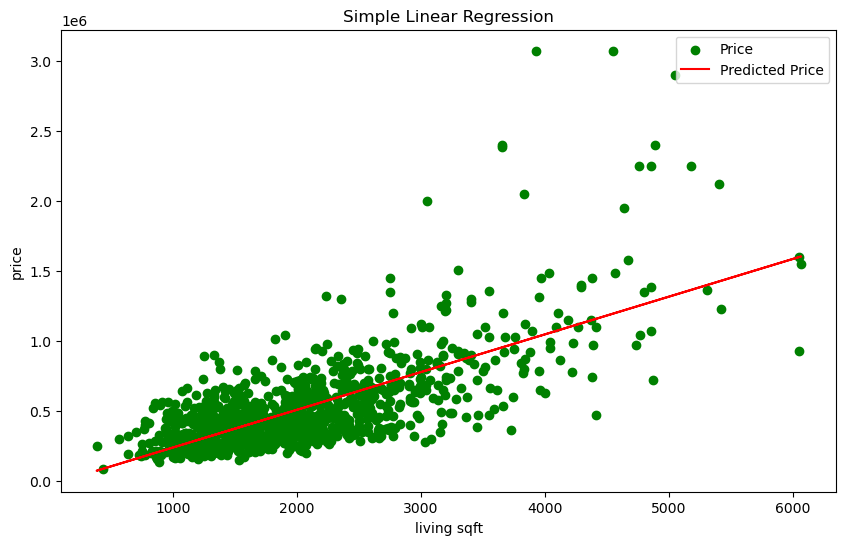

In [95]:
#b)

#Your code:
#predict() is used to predict output values (for example: prices of the houses) based on input values (sqft_living).
y_pred = model.predict(X)

intercept = model.intercept_ #in polish: wyraz wolny, independent term
coef = model.coef_ #Estimated coefficients for the linear regression problem, - współczynnik nachylenia regresji liniowej 

#Return the coefficient of determination of the prediction. - how good model is fitting the data. 
#The best value is 1.0, but suprisingly it also can be negative.
R_score = model.score(X, y)
mse_value = mean_squared_error(y, y_pred)

print("R^2: ", R_score)
print("Mean squared error equals: ", mse_value)

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(X, y, color='green', label='Price')
ax.plot(X, y_pred, color='red', label='Predicted Price')

ax.set_title('Simple Linear Regression')
ax.set_xlabel('living sqft')
ax.set_ylabel('price')

ax.legend()
plt.show()



#Hint: model.predict(), model.intercept_,  model.coef_, model.score()


1. Linear regression model attempts to find a straight line: y = intercept + (coef * X). Intercept is a point where line crosses the y-axis, so the value when x=0. coef - represents a slope of the line, representing how much the Y values will change depending on the consecutive X values. So our red line shows the relationship between prices and sqft_living and the green dots shows what are the prices for different square footage values. The goal of this plot is to show accuracy of our model and how real prices align with predicted ones. 
2. R^2 (model.score(X)) - represents how accurate/well model fit the data. 1 - means perfect, 0 - means horrible. In our case it's around 0.5, so it's ok. 
3. Mean squared error (średni błąd kwadratowy) - calculates the average squared difference (średnia kwadratowa) between the real prices and predicted ones. Lower the value is the more precise model's predictions are. In our case the mean squared error is pretty big, so the results are not that accurate. 

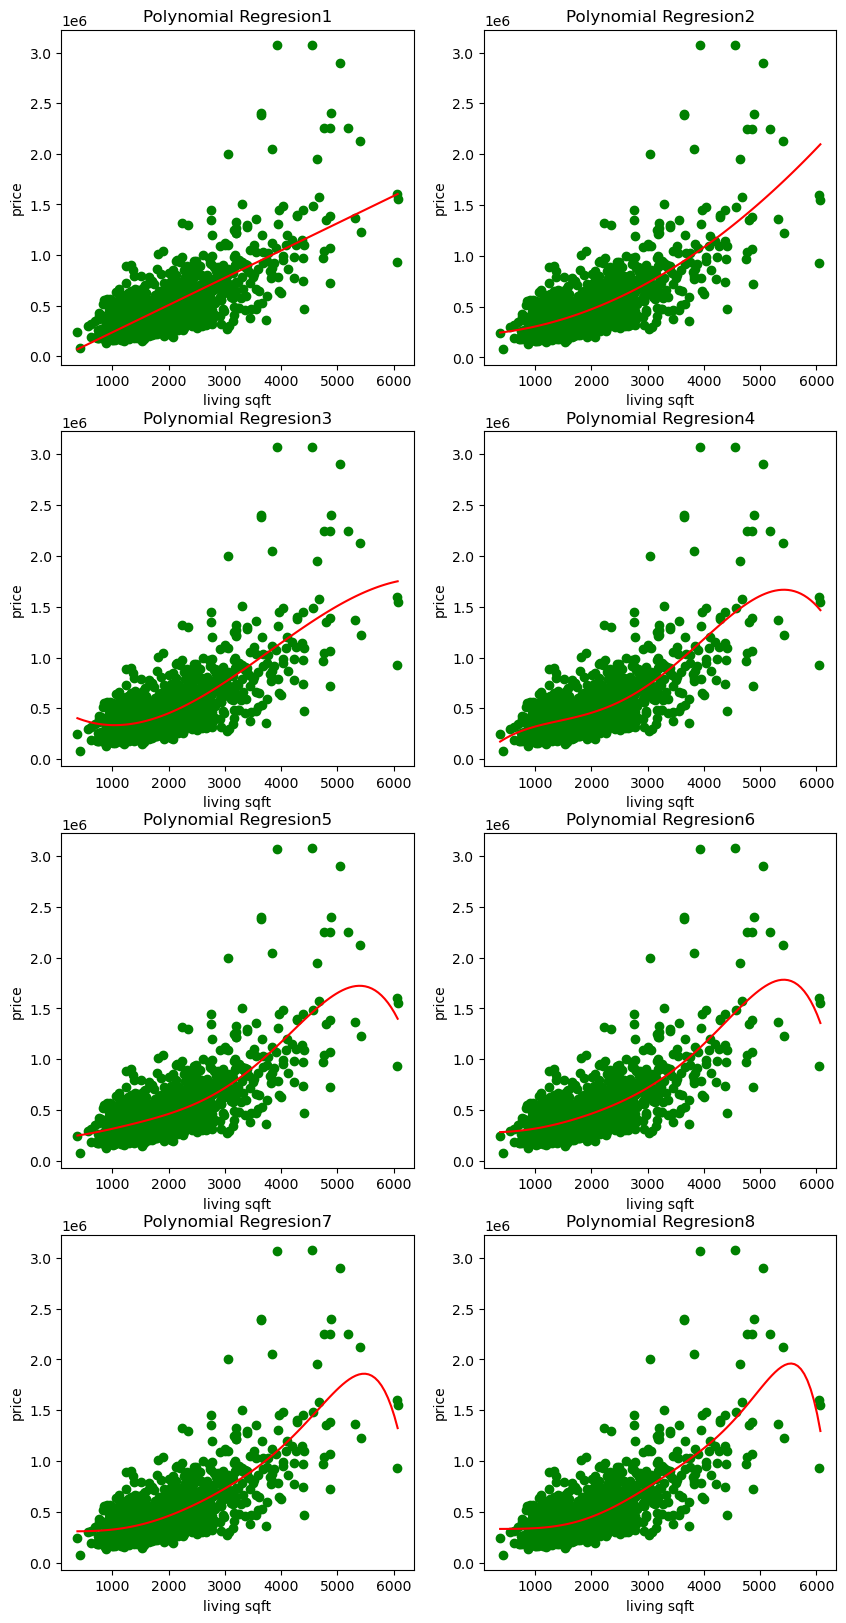

In [97]:
#c)
fig, ax = plt.subplots(4, 2, figsize=(10, 20))
errors = []

for order in range(1,9):
    
    #order determine the degree of the polynomial - so here we're creating a matrix 
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    
    #Your code:
    model = LinearRegression() 
    model.fit(X_order, y)
    
     #collection errors depending on the degree
    y_pred1 = model.predict(X_order)
    mse = mean_squared_error(y, y_pred1)
    errors.append(mse)
    
    #generate smooth curve
    X_new = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
    X_plot_order = poly.transform(X_new)
    y_pred = model.predict(X_plot_order)
    
    row = (order-1)//2
    col = (order-1)%2
    
    ax[row, col].scatter(X, y, color='green')
    ax[row, col].plot(X_new, y_pred, color='red')
    ax[row, col].set_title('Polynomial Regresion'+ str(order))
    ax[row, col].set_xlabel('living sqft')
    ax[row, col].set_ylabel('price')

plt.show()  


1. First of all: we transform the original data into polynomial features based on the specified order and it's used to fit the model.
2. Then we train the LinearRegression model using polynomial features. 
3. X_new is a new range of values from smooth and clean visualisation. We create polynomial features based on this values and use our trained model to predict the curve of the function (Polynomial regression). 

**Process** : We match/train/align our model to the whole data set, because of that our model know the relationship between transformed features and real/actual Y values. Then to generate the prediction on the plot using new X_new data set, which was generated from the original, and it's regular and sorted from the lowest to the highest number. 

**Result** : Order number represent the polynomial order. 
1. First one is a simple Linear regression (y = intercept + (coef * X)).
2. Second, and third model is becoming more matching in comparison with the real values.
3. Plots from 4 to 8 are even more adapted to the data, but some of them (especially the higher ones) can lead to overfitting. As a result model memorize the provided data, which can negatively affect its ability to predict new values. 




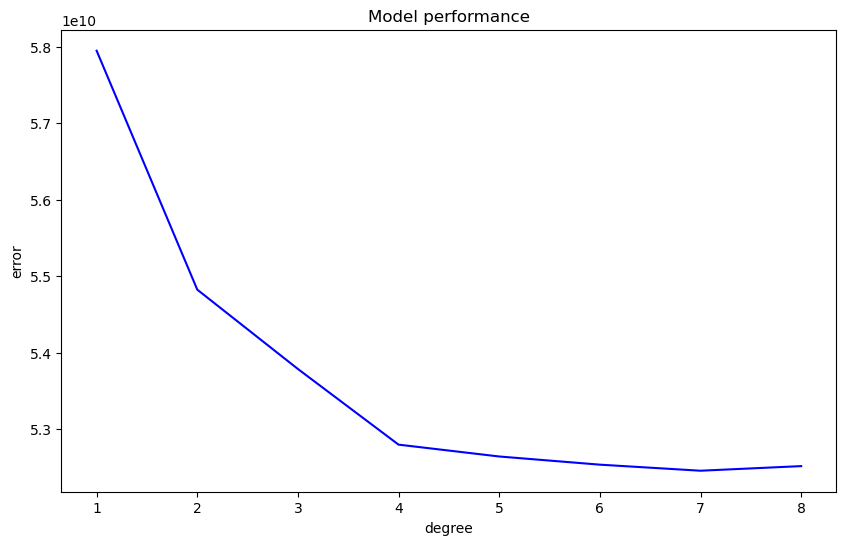

In [98]:
#Your code:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(range(1,9), errors, color='blue')
ax.set_title('Model performance')
ax.set_xlabel('degree')
ax.set_ylabel('error')

plt.show()


As we can observe above, the accuracy of the model prediction is getting higher with the increasing degree number, until the degree reaches 8. Then we can see an example of overfitting, where the error is bigger compared to the previous one. 

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

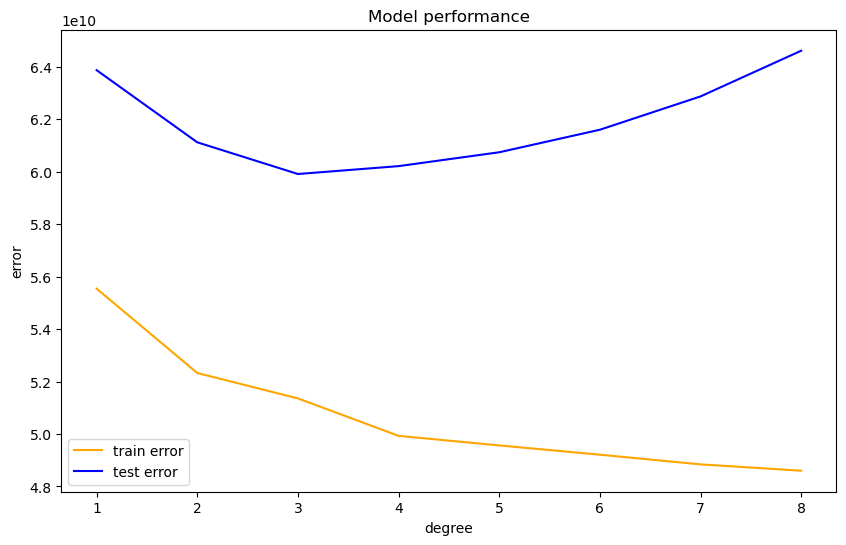

In [102]:
#a)

train_errors = []
test_errors = []

for order in range(1,9):
    
    poly = PolynomialFeatures(order, include_bias=False)
    X_order = poly.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44)
    
    #model training and predicting 
    model = LinearRegression() 
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    #calculating error
    mse_train = mean_squared_error(y_train, y_pred_train)
    train_errors.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    test_errors.append(mse_test)
    
    
plt.figure(figsize=(10, 6))
plt.plot(range(1,9), train_errors, color='orange', label='train error')
plt.plot(range(1,9), test_errors, color='blue', label='test error')
plt.xlabel('degree')
plt.ylabel('error')
plt.title('Model performance')

plt.legend()
plt.show()


On the figure presented above we can observe how good model fit the data. Based on two datasets it's easy to notice the difference between wel-fitted model and overfitted one. 
1. The first data set (training one) shows that the model increases its accuracy with rising order/complexity, the error is lower with the higher degree.
2. The second data set (test) reflects model's ability to generalise to new data. It decreases initially, but then rises with higher degree. =>  it indicates that model is overfitting. 

So it's again a plot which used to show us how crucial it is to choose particular degree level to match the data perfectly. The goal of this plot find balance between small error and great generalisation ability. 


## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

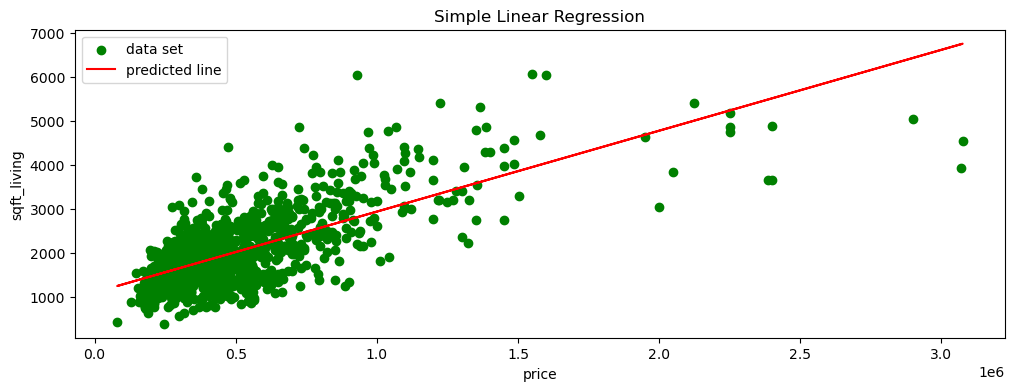

Mean squared error:  396407.1889615157


In [110]:
#a)

X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

model = LinearRegression() 
model.fit(X, y)
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)

plt.figure(figsize=(12, 4))
plt.scatter(X, y, color='green', label='data set')
plt.plot(X, y_pred, color='red', label='predicted line')

plt.xticks(np.arange(0, X.max(), step=500000))
plt.xlabel('price')
plt.ylabel('sqft_living')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

print("Mean squared error: ", mse)


Similar results as below the first figure in this jupyter notebook. What we can notice is the precision of the model, which is good, because the MSE value is low. 

In [50]:
 #b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))
proposed_mse = 48749192708.8445

#proposed model MSE = 48749192708.8445 - I have to try to beat this result. 

#Your model:
#Let's create a correlation table and present it. 
corr_matrix = house_numerical_df.corr(method='pearson')
price_correlation = corr_matrix['price'].sort_values(ascending=False)
corr_table = pd.DataFrame(price_correlation).reset_index()
corr_table.columns = ['Feature', 'Correlation with Price']
corr_table

#continuation below...


Mean squared error equals: 48749192708.8445


,Feature,Correlation with Price
0,price,1.000000
1,sqft_living,0.702035
2,grade,0.667434
3,sqft_above,0.605567
4,sqft_living15,0.585379
5,bathrooms,0.525138
6,view,0.397293
7,sqft_basement,0.323816
8,bedrooms,0.308350
9,lat,0.307003


On the correlation table, I'm trying to find the relationship between each data element to create the best model. 
I'm interested in elements which correlation with price is the closest to 1, which shows its high dependence between elements. 

In [70]:
#choosing highly correlated items - FIRST ATTEMPT
X = house_df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15']].values.reshape(-1,4)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)

model = LinearRegression() 
_= model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_pred, y_test)
if mse > proposed_mse:
    print("Mean squared error: ", mse)
    
#new correlation matrix 
correlation_matrix = house_df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'price', 'bathrooms']].corr()
print(correlation_matrix)


Mean squared error:  52569140721.541664
               sqft_living     grade  sqft_above  sqft_living15     price  \
sqft_living       1.000000  0.762704    0.876597       0.756420  0.702035   
grade             0.762704  1.000000    0.755923       0.713202  0.667434   
sqft_above        0.876597  0.755923    1.000000       0.731870  0.605567   
sqft_living15     0.756420  0.713202    0.731870       1.000000  0.585379   
price             0.702035  0.667434    0.605567       0.585379  1.000000   
bathrooms         0.754665  0.664983    0.685342       0.568634  0.525138   

               bathrooms  
sqft_living     0.754665  
grade           0.664983  
sqft_above      0.685342  
sqft_living15   0.568634  
price           0.525138  
bathrooms       1.000000  


The first attempt is a failure, even by choosing highly correlated features and different orders, I can't train a better model, but lets try a different approach. 

In [88]:
#second attempt 
# Use .loc to avoid the SettingWithCopyWarning
house_numerical_df.loc[:, 'age'] = 2024 - house_numerical_df['yr_built']
X = house_numerical_df[['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'lat', 'long', 'age']].values.reshape(-1,7)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)

model = LinearRegression() 
_= model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_pred, y_test)
R2 = model.score(X_test, y_test)
corr_age_price = house_numerical_df['age'].corr(house_numerical_df['price'], method='pearson')
if mse < proposed_mse:
    print("Mean squared error: ", mse)
    print("R2: ", R2)
    print("Correlation with price: ", corr_age_price)



Mean squared error:  29533010718.901512
R2:  0.7831376917180519
Correlation with price:  -0.0540115314947927


As noted above the mean squared error is lower in comparison with the proposed set of data features. Also, R^2 score is high, which means that the model fit the data really well. What's interesting the even without 'age' feature the MSE score was lower, but slightly. When with the 'age' feature model match the data significantly better. Even when the correlation between those two elements (age - price) is negative => it shows that the other variables have more impact. 